# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2023-24 учебный год

###Математическая оптимизация

### О задании

В данном задании мы потренируемся в работе с математическим анализом и методами математической оптимизации, чёткое понимание которых совершенно необходимо в рамках любой задачи и для любой модели в машинном обучении.

В первой части задания мы будем с вами работать со следующей функцией:

$$y(x) = x^{3} \ln(x)$$

### Задание 1


#### 1.1. (1 балл)

Посчитайте производную данной функции аналитически. Для этого либо воспользуйтесь листком бумаги и прикрепите сюда фотографию, либо используйте язык разметки LaTeX — он поддерживается в юпитеровских ноутбуках.

Производная для функции: $$ y(x) = x^3 \ln(x) $$ Используем правило произведения (если обе функции дифференцируемы):

$$
(uv)' = u'v + uv'
$$

В данном случае:

$$ u(x) = x^3 $$
$$ v(x) = \ln(x) $$

Теперь найдём производные:

$$ u'(x) = \frac{d}{dx}(x^3) = 3x^2 $$
$$ v'(x) = \frac{d}{dx}(\ln(x)) = \frac{1}{x} $$

Используем правило произведения:

$$
\begin{align*}
\frac{d}{dx} [x^3 \ln(x)] &= x^3 \frac{d}{dx}[\ln(x)] + \ln(x) \frac{d}{dx}[x^3] =\\
&= x^3 \cdot \frac{1}{x} + \ln(x) \cdot 3x^2 =\\
&= x^2 + 3x^2 \ln(x) =\\
&= x^2 (1 + 3 \ln(x))
\end{align*}
$$
Ответ:

$$ y'(x) = x^2 (1 + 3 \ln(x)) $$


#### 1.2. (2 балла)

Напишите программную функцию `f(x)`, которая бы вычисляла значение нашей функции в точке и возвращала бы это значение в качестве ответа; и напишите программную функцию `df(x)`, которая бы вычисляла значение производной нашей функции в точке и возвращала бы это значение в качестве ответа.

Обязательно сделайте проверку всех функций на какой-нибудь конкретной точке. Убедитесь, что ответы вашего предыдущего пункта (на листочке) и программного в этом плане полностью совпадают.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
    return x**3 * np.log(x)

In [ ]:
def df(x):
    return x**2 * (1 + 3 * np.log(x))

In [ ]:
x = 2

print(f(x), df(x))

5.545177444479562 12.317766166719343


#### 1.3. (2 балла)

Визуализируйте нашу функцию (постройте график).

Избегаем x=0, поскольку log(0) неопределён, поэтому шаг начинаем с 0.1

In [ ]:
x = np.linspace(0.1, 5, 400)
y = f(x)
dy = df(x)

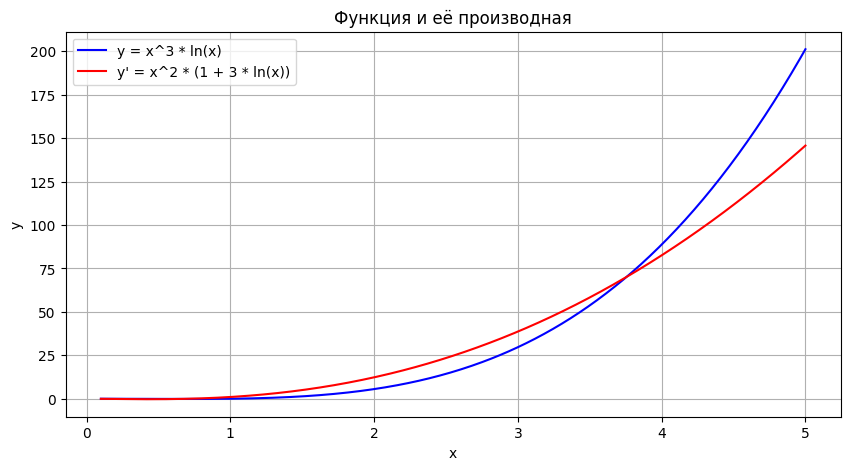

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(x, y, label='y = x^3 * ln(x)', color='blue')
plt.plot(x, dy, label="y' = x^2 * (1 + 3 * ln(x))", color='red')

plt.title('Функция и её производная')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.grid(True)
plt.show()

### Задание 2

#### 2.1. (4 балла)

Реализуйте функцию `get_min_with_gd`, которая принимает на вход начальную точку $x_0$, число шагов, `lr` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска; и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
def get_min_with_gd(x0, steps, lr, threshold):
    x = x0
    points = [x]

    for _ in range(steps):
        grad = df(x)
        x = x - lr * grad
        points.append(x)

        if abs(grad) < threshold:
            break

    return points

In [ ]:
x0 = 2
steps = 1000
lr = 0.01
threshold = 1e-6

get_min_with_gd(x0, steps, lr, threshold)

[2,
 1.8768223383328067,
 1.7750675562698885,
 1.6893162832503643,
 1.6158890885436503,
 1.5521872912837096,
 1.4963160769792376,
 1.4468569984427233,
 1.4027244422791705,
 1.3630716777631635,
 1.3272274157675656,
 1.2946518097620996,
 1.264905224362969,
 1.237625610747658,
 1.2125118192195377,
 1.1893110917208294,
 1.1678095512644053,
 1.1478248755480482,
 1.1292005861522318,
 1.1118015489181392,
 1.0955103935418191,
 1.0802246386918481,
 1.06585436426889,
 1.0523203120542883,
 1.0395523247510388,
 1.027488054534011,
 1.0160718878984634,
 1.0052540453477634,
 0.9949898233573091,
 0.9852389528458206,
 0.9759650536173304,
 0.9671351682979982,
 0.9587193624667663,
 0.9506903801783639,
 0.9430233460578402,
 0.9356955067250837,
 0.9286860055744167,
 0.921975685955887,
 0.9155469186331153,
 0.9093834500674487,
 0.9034702686307486,
 0.8977934863036512,
 0.892340233791607,
 0.8870985673024854,
 0.8820573854889482,
 0.8772063552756917,
 0.8725358454736546,
 0.8680368672365508,
 0.8637010205445

#### 2.2. (2 балла)

Запустите поиск минимума с нескольких любых точек (не менее 3).

Проверьте, что все работает ожидаемым образом, отрисовав график изменения координаты точки, в зависимости от итерации градиентного спуска, для каждого запуска.

In [ ]:
initial_points = [0.5, 2, 4]
steps = 1000
lr = 0.01
threshold = 1e-6

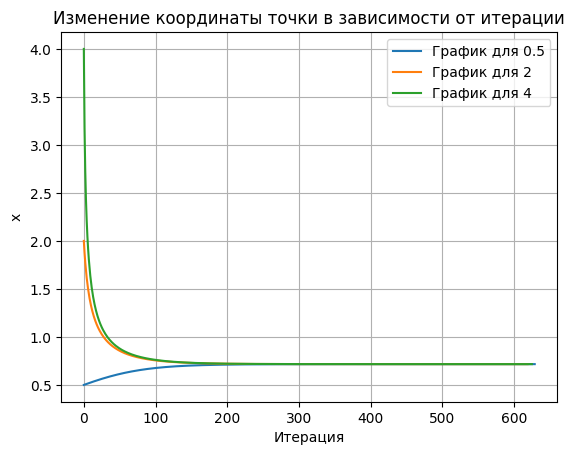

In [ ]:
for x0 in initial_points:
    points = get_min_with_gd(x0, steps, lr, threshold)
    plt.plot(points, label=f'График для {x0}')

plt.title('Изменение координаты точки в зависимости от итерации')
plt.xlabel('Итерация')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()

#### 2.3. (3 балла)

Отрисуйте график самой функции еще раз. На данный график нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Нанесите на график истинный минимум отдельной точкой и подпишите его (в виде текста на графике).

In [ ]:
from scipy.optimize import minimize_scalar

In [ ]:
def find_true_min():
    result = minimize_scalar(f, bounds=(0.1, 5), method='bounded')
    return result.x, result.fun

In [ ]:
true_min_x, true_min_y = find_true_min()

In [ ]:
x = np.linspace(0.1, 5, 400)
y = f(x)

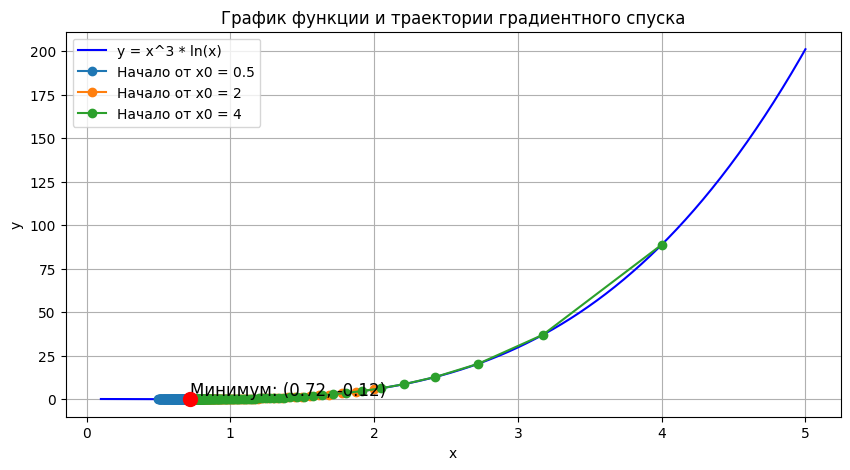

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y = x^3 * ln(x)', color='blue')

for x0 in initial_points:
    points = get_min_with_gd(x0, steps, lr, threshold)
    points_y = [f(point) for point in points]
    plt.plot(points, points_y, marker='o', label=f'Начало от x0 = {x0}')

plt.scatter(true_min_x, true_min_y, color='red', s=100, zorder=5)
plt.text(true_min_x, true_min_y, f'Минимум: ({true_min_x:.2f}, {true_min_y:.2f})', fontsize=12, verticalalignment='bottom')

plt.title('График функции и траектории градиентного спуска')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Задание 3

Начиная с задания 3, мы будем работать с другими функциями.

Пусть

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5\cdot e ^{-y}))$$

#### 3.1. (1 балл и 2 бонусных балла)

Верно ли, что $f$ имеет единственную точку локального минимума, причем этот локальный минимум также является и глобальным? Почему да или почему нет? Докажите ваш ответ!

*Примечание. В данном задании графическое доказательство оценивается в 1 балл; строгое математическое доказательство оценивается в 2 бонусных балла.*

Аналитическое

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

In [ ]:
def f(x, y):
    return np.log((np.exp(x) + np.exp(-2*x)) * (np.exp(y +1) + 0.5 * np.exp(-y)))

In [ ]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [ ]:
result = minimize(lambda xy: f(xy[0], xy[1]), [0, 0])
min_x, min_y = result.x
min_z = f(min_x, min_y)

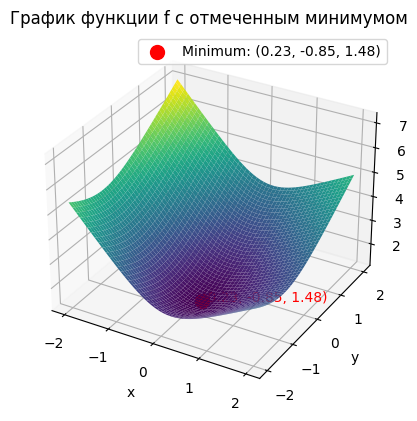

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(min_x, min_y, min_z, color='red', s=100, label=f'Minimum: ({min_x:.2f}, {min_y:.2f}, {min_z:.2f})')
ax.text(min_x, min_y, min_z, f'({min_x:.2f}, {min_y:.2f}, {min_z:.2f})', color='red')

ax.set_title('График функции f с отмеченным минимумом')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()

Математическое

Брал отсюда: https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D1%81%D1%81%D0%B8%D0%B0%D0%BD_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8


Функция $$ f = \log((e^x + e^{-2x}) \cdot (e^{y + 1} + 0.5e^{-y})) $$

Градиент функции

$$
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)
$$

Частные производные:

$$
\frac{\partial f}{\partial x} = \frac{\exp(x) - 2\exp(-2x)}{\exp(x) + \exp(-2x)}
$$

$$
\frac{\partial f}{\partial y} = \frac{\exp(y + 1) - 0.5 \exp(-y)}{\exp(y + 1) + 0.5 \exp(-y)}
$$

Гессиан функции

$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
$$

Найдем вторые производные

$$
\frac{\partial^2 f}{\partial x^2} = \frac{(1 + 4 \exp(-3x)) (\exp(x) + \exp(-2x)) - (\exp(x) - 2\exp(-2x))^2}{(\exp(x) + \exp(-2x))^2}
$$

$$
\frac{\partial^2 f}{\partial y^2} = \frac{(1 + 0.25 \exp(-2y)) (\exp(y + 1) + 0.5 \exp(-y)) - (\exp(y + 1) - 0.5 \exp(-y))^2}{(\exp(y + 1) + 0.5 \exp(-y))^2}
$$

Теперь нам надо найти значение вторых прооизводных в точке минимума, что проверить положительную определенности Гессиана.  Рассмотрим точку, которая получилась на графическом методе (0.23, -0.85):

$$
\frac{\partial^2 f}{\partial x^2}\Bigg|_{(0.23, -0.85)} = \frac{(1 + 4 \exp(-3 \cdot 0.23)) (\exp(0.23) + \exp(-2 \cdot 0.23)) - (\exp(0.23) - 2\exp(-2 \cdot 0.23))^2}{(\exp(0.23) + \exp(-2 \cdot 0.23))^2}
$$

$$
\frac{\partial^2 f}{\partial x^2}\Bigg|_{(0.23, -0.85)} \approx \frac{(1 + 4 \exp(-0.69)) (\exp(0.23) + \exp(-0.46)) - (\exp(0.23) - 2\exp(-0.46))^2}{(\exp(0.23) + \exp(-0.46))^2}
$$

$$
\frac{\partial^2 f}{\partial y^2}\Bigg|_{(0.23, -0.85)} = \frac{(1 + 0.25 \exp(-2 \cdot -0.85)) (\exp(-0.85 + 1) + 0.5 \exp(0.85)) - (\exp(-0.85 + 1) - 0.5 \exp(0.85))^2}{(\exp(-0.85 + 1) + 0.5 \exp(0.85))^2}
$$



$$
\frac{\partial^2 f}{\partial y^2}\Bigg|_{(0.23, -0.85)} \approx \frac{(1 + 0.25 \exp(1.7)) (\exp(0.15) + 0.5 \exp(0.85)) - (\exp(0.15) - 0.5 \exp(0.85))^2}{(\exp(0.15) + 0.5 \exp(0.85))^2}
$$

Две дроби должны быть положительными, чтобы подтвердить положительную определенность в точке минимумма. Тогда получится доказать, что f имеет единственный локальный минимум в точке (0.23, -0.85), который также является глобальным минимумом.



#### 3.2. (3 балла и 2 бонусных балла)

Придумайте какие-нибудь функции $g$ и $h$ от двух переменных, такие что
- функция $g$ не имеет глобального минимума (не ограничена снизу);
- функция $h$ имеет по крайней мере два локальных минимума, неравных друг другу.

Докажите, что ваши функции удовлетворяют заявленным критериям.

*Примечание. В данном задании графическое доказательство оценивается в рамках основных баллов; строгое математическое доказательство оценивается в 2 бонусных балла.*

Пусть $$ g = x^2 - y^2$$
и $$ h = (x^2-1) + (y^2-1)$$
У второй функции локальные минимумы в (1, 1) и (-1, -1), еще (-1, 1) и (1, -1)

Аналитически

In [ ]:
def g(x, y):
    return x**2 - y**2

def h(x, y):
    return (x**2 - 1)**2 + (y**2 - 1)**2

In [ ]:
X, Y = np.meshgrid(x, y)
Zg = g(X, Y)
Zh = h(X, Y)

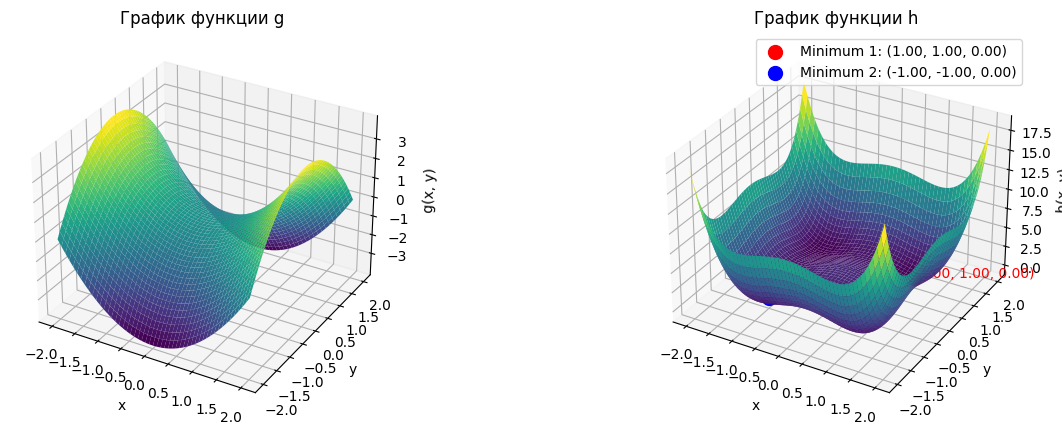

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': '3d'})

# g
ax1.plot_surface(X, Y, Zg, cmap='viridis')
ax1.set_title('График функции g')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('g(x, y)')

# h
ax2.plot_surface(X, Y, Zh, cmap='viridis')
ax2.set_title('График функции h')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('h(x, y)')

result1 = minimize(lambda xy: h(xy[0], xy[1]), [1, 1])
result2 = minimize(lambda xy: h(xy[0], xy[1]), [-1, -1])
min1_x, min1_y = result1.x
min2_x, min2_y = result2.x
min1_z = h(min1_x, min1_y)
min2_z = h(min2_x, min2_y)

ax2.scatter(min1_x, min1_y, min1_z, color='red', s=100, label=f'Minimum 1: ({min1_x:.2f}, {min1_y:.2f}, {min1_z:.2f})')
ax2.scatter(min2_x, min2_y, min2_z, color='blue', s=100, label=f'Minimum 2: ({min2_x:.2f}, {min2_y:.2f}, {min2_z:.2f})')
ax2.text(min1_x, min1_y, min1_z, f'({min1_x:.2f}, {min1_y:.2f}, {min1_z:.2f})', color='red')
ax2.text(min2_x, min2_y, min2_z, f'({min2_x:.2f}, {min2_y:.2f}, {min2_z:.2f})', color='blue')
ax2.legend()

plt.show()

математически

По доказательству не сильно отличается от 3.1, почти по аналогии.

$$ g(x, y) = x^2 - y^2 $$ и $$ h(x, y) = (x^2 - 1)^2 + (y^2 - 1)^2 $$.

g представляет собой гиперболический параболоид, который не ограничен снизу. Это означает, что g не имеет глобального минимума.

Для любого фиксированного значения x, если взять y достаточно большим по абсолютному значению, значение g(x, y) может стать сколь угодно большим и отрицательным. Следовательно, функция g не имеет глобального минимума.

Если говорить про h, то она имеет два локальных минимума в точках (1, 1)и (-1, -1).

Точка (x, y) является локальным минимумом h, если градиент функции в этой точке равен нулю и Гессиан положительно определен.

$$
\nabla h = \left( \frac{\partial h}{\partial x}, \frac{\partial h}{\partial y} \right)
$$

Найдем частные производные:

$$
\frac{\partial h}{\partial x} = 4x(x^2 - 1)
$$

$$
\frac{\partial h}{\partial y} = 4y(y^2 - 1)
$$

Гессиан функции


$$H = \begin{bmatrix}
\frac{\partial^2 h}{\partial x^2} & \frac{\partial^2 h}{\partial x \partial y} \\
\frac{\partial^2 h}{\partial y \partial x} & \frac{\partial^2 h}{\partial y^2}
\end{bmatrix}
$$

Честно, мне дальше писать лень, но я уверяю, он определен и там два минимума



#### 3.3. (5 баллов)

Реализуйте функцию `get_min_with_rmsprop`, которая принимает на вход начальную точку $x_0$, число шагов, `lr`, `beta` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска с модификацией RMSProp; и возвращает последовательность точек, полученных на каждом шаге.

Напомним, как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ — learning rate, $ɛ$ — малое число (можно взять 0.0001 — оно нужно, чтобы случайно не было деления на 0), $\beta$ — мера учета инерции.



In [ ]:
def get_min_with_rmsprop(func, grad_func, x0, y0, steps, lr, beta, threshold):
    eps = 1e-4
    x, y = x0, y0
    points = [(x, y)]
    gamma_x, gamma_y = 0, 0

    for _ in range(steps):
        grad_x, grad_y = grad_func(x, y)

        gamma_x = (1 - beta) * gamma_x + beta * grad_x**2
        gamma_y = (1 - beta) * gamma_y + beta * grad_y**2

        x = x - lr / (np.sqrt(gamma_x) + eps) * grad_x
        y = y - lr / (np.sqrt(gamma_y) + eps) * grad_y

        points.append((x, y))

        if np.sqrt(grad_x**2 + grad_y**2) < threshold:
            break

    return points

#### 3.4. (4 балла)

Запустите поиск минимума для всех трёх функций ($f$, $g$, $h$) с нескольких любых точек (не менее 3 — таким образом, минимум 9 запусков).

Проверьте, что все работает ожидаемым образом, отрисовав для каждого запуска график изменения координат точки (2D-график) по мере прохождения градиентного спуск. Все графики строятся на трёх парах осей, размещенных вертикально на одном полотне (свои оси для каждой функции; разные запуски для одной функции изображаются на одних осях).

In [ ]:
def grad_f(x, y):
    grad_x = (np.exp(x) - 2 * np.exp(-2*x)) / (np.exp(x) + np.exp(-2*x))
    grad_y = (np.exp(y + 1) - 0.5 * np.exp(-y)) / (np.exp(y + 1) + 0.5 * np.exp(-y))
    return grad_x, grad_y

def grad_g(x, y):
    grad_x = 2 * x
    grad_y = -2 * y
    return grad_x, grad_y

def grad_h(x, y):
    grad_x = 4 * x * (x**2 - 1)
    grad_y = 4 * y * (y**2 - 1)
    return grad_x, grad_y

In [ ]:
functions = [(f, grad_f), (g, grad_g), (h, grad_h)]
func_names = ['f', 'g', 'h']
initial_points = [(1, 0.4), (0.5, 0.5), (-0.2, 0.3)]
steps = 1000
lr = 0.01
beta = 0.9
threshold = 1e-6

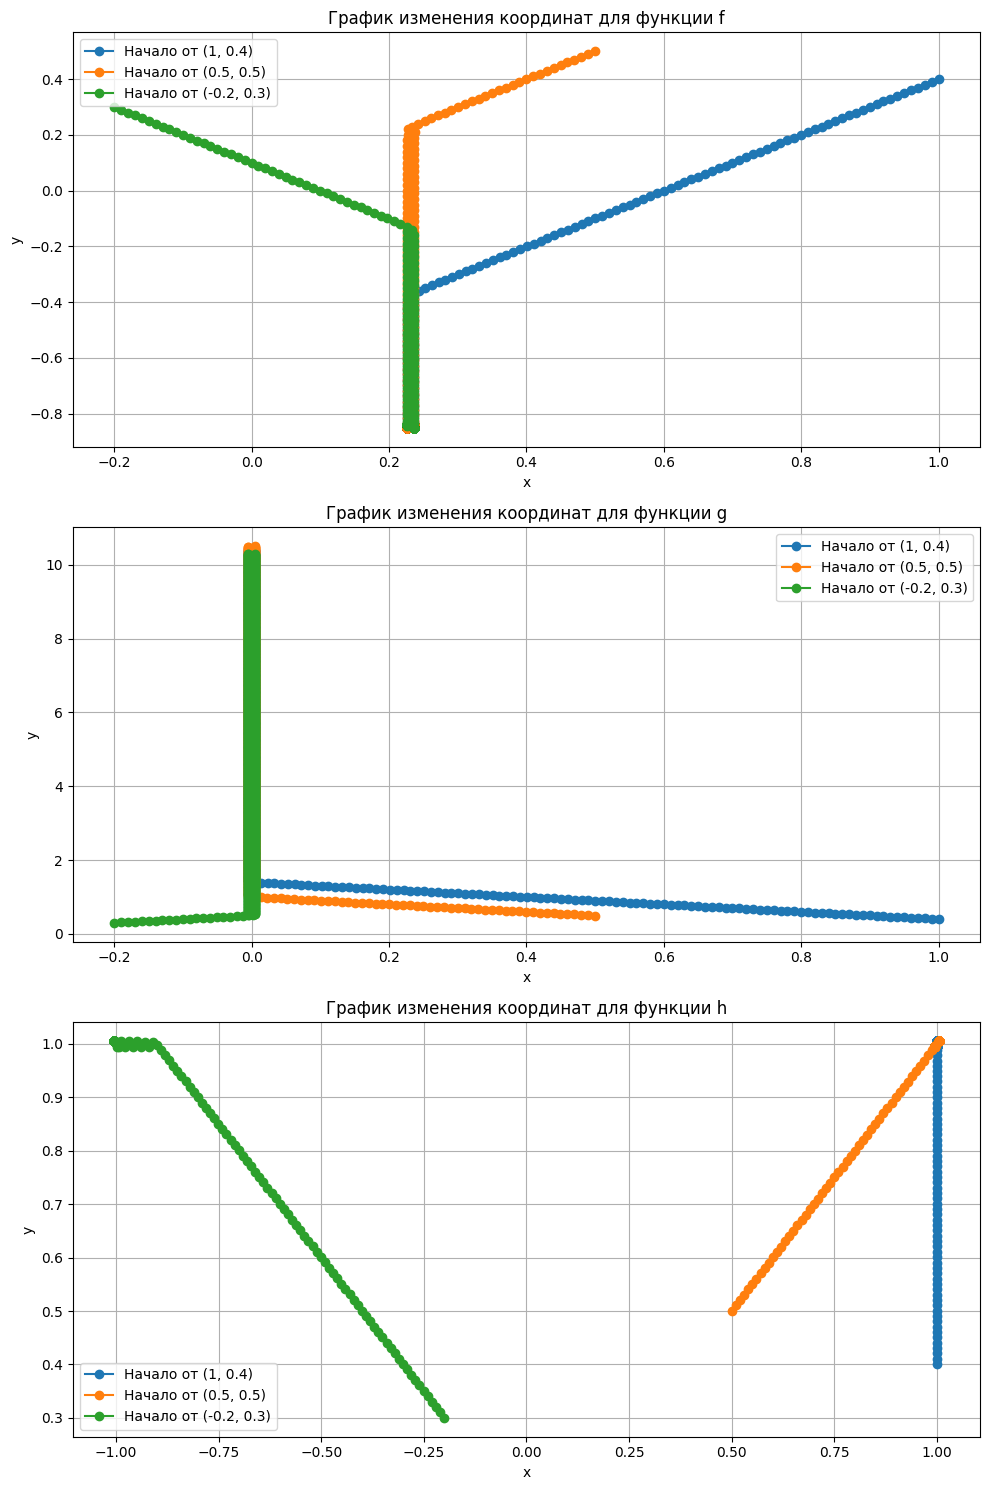

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (func, grad_func) in enumerate(functions):
    for x0, y0 in initial_points:
        points = get_min_with_rmsprop(func, grad_func, x0, y0, steps, lr, beta, threshold)
        xs, ys = zip(*points)
        axes[i].plot(xs, ys, marker='o', label=f'Начало от ({x0}, {y0})')

    axes[i].set_title(f'График изменения координат для функции {func_names[i]}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### 3.5. (3 балла)

Отрисуйте графики самих функций еще раз. На данные графики нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Там, где они есть у функции, нанесите на графики истинные локальные минимумы функций в виде отдельных точек, а также подпишите их в виде текста на графике. Все графики строятся на трёх множествах осей, размещенных вертикально на одном полотне — свои оси для каждой функции.

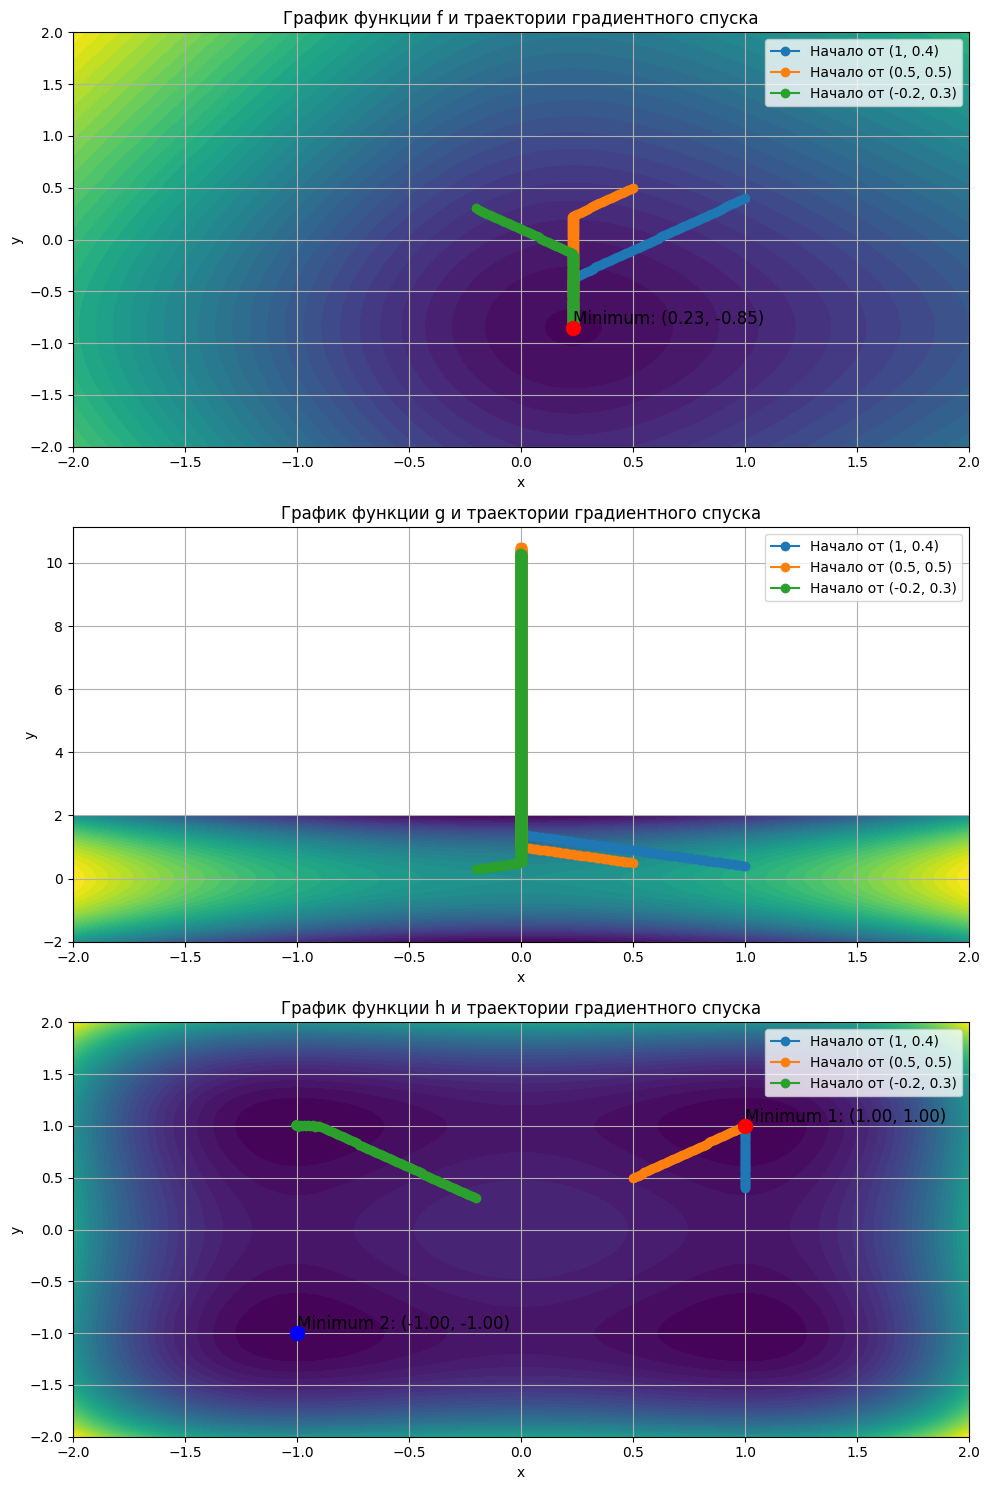

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (func, grad_func, func_name) in enumerate(zip([f, g, h], [grad_f, grad_g, grad_h], func_names)):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    if func_name == 'f':
        Z = f(X, Y)
    elif func_name == 'g':
        Z = g(X, Y)
    elif func_name == 'h':
        Z = h(X, Y)
    axes[i].contourf(X, Y, Z, levels=50, cmap='viridis')

    for x0, y0 in initial_points:
        points = get_min_with_rmsprop(func, grad_func, x0, y0, steps, lr, beta, threshold)
        xs, ys = zip(*points)
        axes[i].plot(xs, ys, marker='o', label=f'Начало от ({x0}, {y0})')

    axes[i].set_title(f'График функции {func_name} и траектории градиентного спуска')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].grid(True)

    if func_name == 'f':
        min_x, min_y = 0.23, -0.85
        min_z = f(min_x, min_y)
        axes[i].scatter(min_x, min_y, color='red', s=100, zorder=5)
        axes[i].text(min_x, min_y, f'Minimum: ({min_x:.2f}, {min_y:.2f})', fontsize=12, verticalalignment='bottom')

    if func_name == 'h':
        min1_x, min1_y = 1, 1
        min2_x, min2_y = -1, -1
        min1_z = h(min1_x, min1_y)
        min2_z = h(min2_x, min2_y)
        axes[i].scatter(min1_x, min1_y, color='red', s=100, zorder=5)
        axes[i].text(min1_x, min1_y, f'Minimum 1: ({min1_x:.2f}, {min1_y:.2f})', fontsize=12, verticalalignment='bottom')
        axes[i].scatter(min2_x, min2_y, color='blue', s=100, zorder=5)
        axes[i].text(min2_x, min2_y, f'Minimum 2: ({min2_x:.2f}, {min2_y:.2f})', fontsize=12, verticalalignment='bottom')

plt.tight_layout()
plt.show()

на последнем графике все нормально, там четыре минимума, но я отметил лишь два)

### Задание 4

#### Масштабирование на многомерный случай (4 балла)

Удостоверьтесь в том, что ваша функция `get_min_with_rmsprop` из прошлого задания работает не только с функциями от двух переменных, но и с функциями от произвольного числа переменных. При необходимости внесите в функцию корректировки ниже.

Придумайте любую функцию от 5 переменных, у которой есть какой-нибудь минимум (например, самое простое, точка $(0, 0, 0, 0, 0)$) и запустите градиентный спуск с RMSProp для этой функции. Проверьте, что градиентный спуск действительно сходится в правильную точку экстремума.

In [ ]:
def get_min_with_rmsprop_multidim(func, grad_func, x0, steps, lr, beta, threshold):
    eps = 1e-4
    x = np.array(x0)
    points = [x.copy()]
    gamma = np.zeros_like(x)

    for _ in range(steps):
        grad = grad_func(x)
        gamma = (1 - beta) * gamma + beta * grad**2
        x = x - lr / (np.sqrt(gamma) + eps) * grad
        points.append(x.copy())

        if np.linalg.norm(grad) < threshold:
            break

    return points

In [ ]:
def example_func_5d(x):
    return sum([xi**2 for xi in x])

def grad_example_func_5d(x):
    return np.array([2 * xi for xi in x])

In [ ]:
x0 = [5, 5, 5, 5, 5]
steps = 1000
lr = 0.01
beta = 0.9
threshold = 1e-6

Можем отрисовать последовательность точек для примера

In [ ]:
get_min_with_rmsprop_multidim(example_func_5d, grad_example_func_5d, x0, steps, lr, beta, threshold)

[array([5, 5, 5, 5, 5]),
 array([4.98945919, 4.98945919, 4.98945919, 4.98945919, 4.98945919]),
 array([4.97941084, 4.97941084, 4.97941084, 4.97941084, 4.97941084]),
 array([4.96940813, 4.96940813, 4.96940813, 4.96940813, 4.96940813]),
 array([4.95940996, 4.95940996, 4.95940996, 4.95940996, 4.95940996]),
 array([4.94941226, 4.94941226, 4.94941226, 4.94941226, 4.94941226]),
 array([4.9394146, 4.9394146, 4.9394146, 4.9394146, 4.9394146]),
 array([4.92941695, 4.92941695, 4.92941695, 4.92941695, 4.92941695]),
 array([4.91941931, 4.91941931, 4.91941931, 4.91941931, 4.91941931]),
 array([4.90942167, 4.90942167, 4.90942167, 4.90942167, 4.90942167]),
 array([4.89942403, 4.89942403, 4.89942403, 4.89942403, 4.89942403]),
 array([4.88942641, 4.88942641, 4.88942641, 4.88942641, 4.88942641]),
 array([4.87942878, 4.87942878, 4.87942878, 4.87942878, 4.87942878]),
 array([4.86943116, 4.86943116, 4.86943116, 4.86943116, 4.86943116]),
 array([4.85943355, 4.85943355, 4.85943355, 4.85943355, 4.85943355]),


Ну и на сходимость проверим заодно

In [ ]:
print("Конечная точка:", points[-1])
print("Значение функции в конечной точке:", example_func_5d(points[-1]))

Конечная точка: (-0.9949751878319721, 0.9949751878319721)
Значение функции в конечной точке: 1.9799512488025366
